In [8]:
import h5py
import numpy as np

import matplotlib.pyplot as plt

#Set fonts
from matplotlib import rc, rcParams, cm
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})
#Use tex for math
rcParams['mathtext.fontset'] = 'cm'
rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [9]:
def PlotLine(y = 2*56.25/25.4, x = 1.5*56.25/25.4, dpi=100):
    fig, ax = plt.subplots(figsize=(y, x), dpi=dpi, tight_layout=True)
    return ax

### Read results

In [10]:
nSteps = 50

modelName = "TDSHT990.diff.out.hdf5"

Time_HT = np.zeros(nSteps)
Con_HT = np.zeros(nSteps)
Temp_HT = np.zeros(nSteps)

fh5 = h5py.File(modelName, "r")

for iStep in range(nSteps):
    
    Time_HT[iStep] = fh5["Time"]["Step_"+str(iStep)][()][0]
    Con_HT[iStep] = fh5["AvCon"]["Step_"+str(iStep)][()][0]
    Temp_HT[iStep] = fh5["Temp"]["Step_"+str(iStep)][()][0]
    
fh5.close()

Con_HT_wppm = Con_HT*1.008/(7.874)

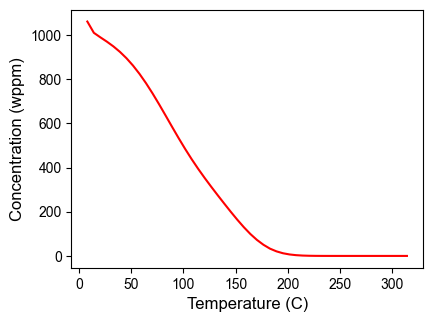

In [11]:
ax = PlotLine()

ax.plot(Temp_HT-273, Con_HT, "r", lw=1.5)

ax.set_xlabel("Temperature (C)", fontsize=12)
ax.set_ylabel("Concentration (wppm)", fontsize=12)

plt.savefig("ConTemp.svg")

### Calculate desorption rate

$$-\frac{\Delta c}{\Delta t}$$

In [12]:
DR_HT = -np.diff(Con_HT_wppm)/np.diff(Time_HT)
TEMP_HT = Temp_HT[1:]

Text(0, 0.5, 'Desorption rate (wppm/s)')

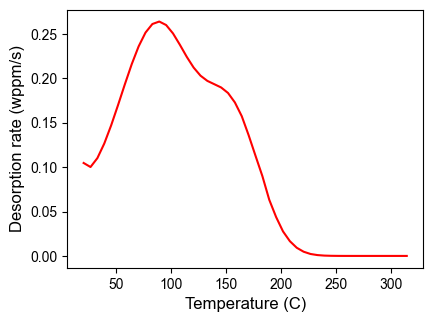

In [13]:
ax = PlotLine()

ax.plot(TEMP_HT[1:]-273, DR_HT[1:], "r", lw=1.5)

ax.set_xlabel("Temperature (C)", fontsize=12)
ax.set_ylabel("Desorption rate (wppm/s)", fontsize=12)

# plt.savefig("TDS.svg")